In [3]:
from qiskit import IBMQ
# IBMQ.save_account(MY_API_TOKEN)
import qiskit
qiskit.__version__


import scipy
import numpy as np
import random

from sklearn import preprocessing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info.operators import Operator
from qiskit import(QuantumCircuit, execute, Aer)
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize # Import the Inititialize function
from qiskit.aqua.circuits.gates import multi_control_toffoli_gate
from qiskit.aqua.circuits.gates import multi_control_multi_target_gate

import torch
from torch.autograd import Function
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms

import timeit
import matplotlib.pyplot as plt
%matplotlib inline   
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import img_as_bool

import cv2 as cv

In [2]:
image_height = 14
image_width = 14

len_x = image_height * image_width
len_y = 0

In [3]:
mnist_dataset = pd.read_csv('../data/mnist_train.csv')
X_train = mnist_dataset.values[:,1:]
img = np.resize(X_train[1], (28, 28))

In [4]:
def random_image(dataset):
    return random.choice(dataset)

12665
12665


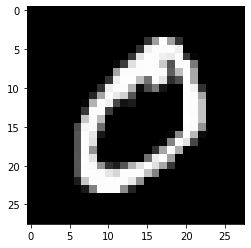

In [5]:
X_train = mnist_dataset.values[:,1:]
X_train2 = mnist_dataset.values[:,:]
# print(mnist_dataset.values[:,0])
X_train3 = mnist_dataset.values[np.where(mnist_dataset.values[:,0] < 2), 1:]
labels =mnist_dataset.values[np.where(mnist_dataset.values[:,0] < 2), 0]
# print(labels)
# print(X_train3)

image = random_image(X_train3[0])
print(len(X_train3[0]))
imgs = np.resize(X_train3[0], (len(X_train3[0]), 28, 28)) / 255
print(len(imgs))
plt.imshow(imgs[0])
plt.show()

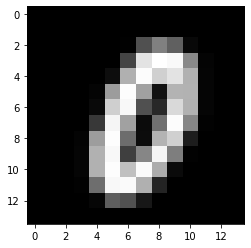

In [6]:
# print([img for img in imgs)
images_resized = [resize(img, (14, 14), anti_aliasing=True) for img in imgs]
# print(images_resized)
plt.imshow(images_resized[8])
plt.show()
# print(image_resized)
# # img = np.array(data).reshape(image_height, -1)
# print(len(X_train[0]))
# # plt.imshow(np.resize(X_train[0], (28, 28)))
# plt.show()

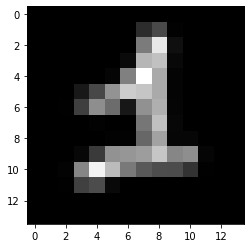

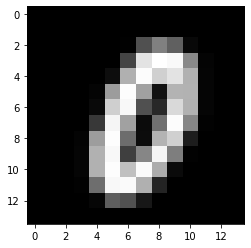

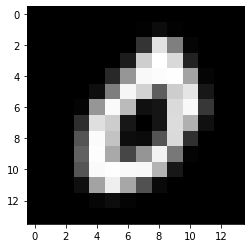

In [7]:
plt.imshow(images_resized[7])
plt.show()
plt.imshow(images_resized[8])
plt.show()
plt.imshow(images_resized[9])
plt.show()

12665


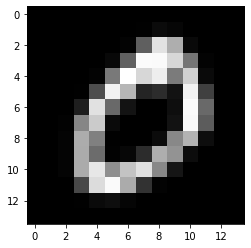

12665
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 1 1 1 0 0]
 [0 0 1 1 1 1 0 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


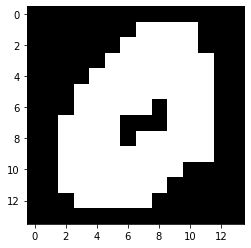

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
images_normalized = [cv.normalize(image_resized,  image_resized, 0, 255, cv.NORM_MINMAX) for image_resized in images_resized]
print(len(images_normalized))
plt.imshow(images_normalized[0])
plt.show()

data = [np.where(image_resized > 0.1, 1, 0) for image_resized in images_resized]
print(len(data))
print(data[0])
plt.imshow(data[0])
plt.show()
# data = np.reshape(data, (image_height*image_height))
data = [x.flatten().tolist() for x in data]
# len_y = len(X_train3[0])
print(data[0])

In [8]:
def exctract_single_qubit_measurment(dict_of_counts, qubit_range):
#     print(dict_of_counts)
#     print(len(list(dict_of_counts.keys())[0]))
    num_qubits = len(list(dict_of_counts.keys())[0])
#     result = np.zeros(len(qubit_range))
    result = np.zeros(num_qubits)
#     print(result)
    for el in dict_of_counts:
        for i in range(num_qubits):
#             print("i", i)
#             print("el[i]", el[i])
            if i in qubit_range and el[i] == '1':
                result[i] += dict_of_counts[el]
#     print(result)
#     print(result[qubit_range])
    return result[qubit_range]

In [9]:
# TUTAJ ZACZYNAM KOD

In [10]:
class QMLCircuit():
    def __init__(self, visible, hidden, num_shots=1000):
        self.visible = visible
        self.hidden = hidden
        self.ancilla = visible-1
        self.qr = QuantumRegister((self.visible + self.hidden + self.ancilla), 'q')
        self.cr = ClassicalRegister(self.hidden, 'c')
        self.qc = QuantumCircuit(self.qr, self.cr)

        self.num_shots = num_shots
    
#     def run(self, thetas):
    def circuit_function(self, x, weight_matrix):
        self.qc.data = []

        # inicjalizacja wartości qubitów wejściowych (x)
        initial_state = [[np.sqrt(1-x[i]), np.sqrt(x[i])] for i in range(len(x))]

        # inicjalizacja wartości qubitów wejściowych i bramka Hadamarda
        for i in range(visible):
            initialize_qubit = Initialize(initial_state[i])
            self.qc.append(initialize_qubit, [i])
            self.qc.h(i)

        # ciąg bramek CNOT i bramek rotacji R (zależnych od parametrów)
        for i in range(self.hidden):
            for j in range(self.visible):
                self.qc.ry(weight_matrix[j][i], j)
            print([self.qr[k] for k in range(self.visible)])
            print(self.qr[self.visible + i])
            print([self.qr[i] for i in range(self.visible + self.hidden, self.visible + self.hidden + self.ancilla)])
            multi_control_toffoli_gate.mct(self.qc, [self.qr[k] for k in range(self.visible)], self.qr[self.visible + i], [self.qr[i] for i in range(self.visible + self.hidden, self.visible + self.hidden + self.ancilla)], mode='basic')

        # pomiar linii visible
        self.qc.measure(list(range(visible, visible+hidden)), list(range(hidden)))

        #eksperyment:
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(self.qc, simulator, shots=self.num_shots)
        result = job.result()
        counts = result.get_counts(self.qc)
        ph = exctract_single_qubit_measurment(counts, list(range(self.hidden))) / self.num_shots
    #     print("\nProbabilities are:",ph)
        return ph

In [11]:
visible = 2
hidden = 1
    
QMLC = QMLCircuit(visible, hidden, 1000)
#definicja wejścia (x)oraz inicjalizacja macierzy wag
x = np.array([random.uniform(0, 1) for n in range(visible)])
weight_matrix = np.random.rand(visible, hidden) * np.pi
print(QMLC.circuit_function(x, weight_matrix))
QMLC.qc.draw()

[Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1)]
Qubit(QuantumRegister(4, 'q'), 2)
[Qubit(QuantumRegister(4, 'q'), 3)]
[0.032]


┌─────────────────────────────┐┌───┐ ┌────────────┐        
q_0: |0>┤ Initialize(0.44972,0.89317) ├┤ H ├─┤ Ry(1.9375) ├──■─────
        ├─────────────────────────────┤├───┤┌┴────────────┤  │     
q_1: |0>┤ Initialize(0.81334,0.58179) ├┤ H ├┤ Ry(0.30168) ├──■─────
        └─────────────────────────────┘└───┘└─────────────┘┌─┴─┐┌─┐
q_2: |0>───────────────────────────────────────────────────┤ X ├┤M├
                                                           └───┘└╥┘
q_3: |0>─────────────────────────────────────────────────────────╫─
                                                                 ║ 
 c_0: 0 ═════════════════════════════════════════════════════════╩═

In [38]:
class QFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, QMLC, epsilon):
        """ Forward pass computation """
        ctx.epsilon = epsilon
        ctx.QMLC = QMLC
        print(input)
        ph = ctx.QMLC(input[0].tolist())
        result = torch.tensor([ph])
        ctx.save_for_backward(input, result)

        return result
        
    @staticmethod
    def backward(ctx, grad_output):
#     def update(ph, expected_ph, weight_matrix, lr):
        input, ph = ctx.saved_tensors
        input_list = np.array(input.tolist())
        
        


        gradients = []
            gradient_row = []
            for j, el in enumerate(row):
                weight_matrix[i][j] += epsilon
                result_plus = circuit_function(qc, weight_matrix)

                weight_matrix[i][j] -= 2*epsilon
                result_minus = circuit_function(qc, weight_matrix)

                weight_matrix[i][j] += epsilon
    #             result_zero = circuit_function(qc, weight_matrix)
    #             print("ph", result_zero)
    #             print("exp_ph", expected_ph)
    #             print("el final:", el)
    #             print(result_plus - result_minus)
                result = (result_plus - result_minus)/(2*epsilon) * lr * (ph - expected_ph)
                gradient_row.append(result)
            gradient.append(gradient_row)
    #     print("gradient", gradient)

        weight_matrix = weight_matrix - gradient
        return weight_matrix
        
        
        
        """ Backward pass computation """
        input, ph = ctx.saved_tensors
        input_list = np.array(input.tolist())
        
        shift_right = input_list + np.ones(input_list.shape) * ctx.epsilon
        shift_left = input_list - np.ones(input_list.shape) * ctx.epsilon
        
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None, None

class QuantumLayer(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, epsilon):
        super(QuantumLayer, self).__init__()
        self.QMLC = QMLCircuit(1, 1, 1000)
        self.epsilon = epsilon
        
    def forward(self, input):
        return QFunction.apply(input, self.QMLC, self.epsilon)

IndentationError: unexpected indent (<ipython-input-38-4c133da272bc>, line 22)

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.cat((x, 1 - x), -1)

In [22]:
# Concentrating on the first 100 samples
n_samples = 100

X_train = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

# Leaving only labels 0 and 1 
idx = np.append(np.where(X_train.targets == 0)[0][:n_samples], 
                np.where(X_train.targets == 1)[0][:n_samples])

X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)

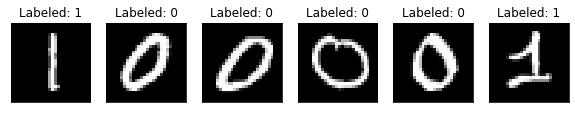

In [23]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0].numpy().squeeze(), cmap='gray')
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets.item()))
    
    n_samples_show -= 1

In [24]:
n_samples = 50

X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

idx = np.append(np.where(X_test.targets == 0)[0][:n_samples], 
                np.where(X_test.targets == 1)[0][:n_samples])

X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)

In [25]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.NLLLoss()

epochs = 20
loss_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    print(i for i in enumerate(train_loader))
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        # Forward pass
        output = model(data)
        # Calculating loss
        loss = loss_func(output, target)
        # Backward pass
        loss.backward()
        # Optimize the weights
        optimizer.step()
        
        total_loss.append(loss.item())
    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

<generator object <genexpr> at 0x000001B240747F48>


ValueError: Expected input batch_size (25) to match target batch_size (1).

In [48]:
for epoch in range(epochs):
    total_loss = []
    print(i for i in enumerate(train_loader))
    for batch_idx, something in enumerate(train_loader):
        print(batch_idx)
        print(something)

<generator object <genexpr> at 0x000001A50FA29A98>
0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1
tensor([[[0, 1, 1,  ..., 1, 0, 1]]])
<generator object <genexpr> at 0x000001A50FA29A98>
0
tensor([[[0, 1, 1,  ..., 1, 0, 1]]])
1


KeyboardInterrupt: 

In [49]:
print(something)

KeyboardInterrupt: 

In [74]:
class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    
    def __init__(self, visible, hidden, backend, shots):
        # --- Circuit definition ---
        self.qc = qiskit.QuantumCircuit(visible + hidden)
        
        all_qubits = [i for i in range(visible+hidden)]
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        self._circuit.ry(self.theta, all_qubits)
        
        self._circuit.measure_all()
        # ---------------------------

        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        job = qiskit.execute(self._circuit, 
                             self.backend, 
                             shots = self.shots,
                             parameter_binds = [{self.theta: theta} for theta in thetas])
        result = job.result().get_counts(self._circuit)
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
        
        # Compute probabilities for each state
        probabilities = counts / self.shots
        # Get state expectation
        expectation = np.sum(states * probabilities)
        
        return np.array([expectation])
    
    
simulator = qiskit.Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(1, 1, simulator, 100)
print('Expected value for rotation pi {}'.format(circuit.run([np.pi])[0]))
circuit._circuit.draw()

AttributeError: 'QuantumCircuit' object has no attribute 'theta'

In [0]:
epsilon = 0.01
def update(ph, expected_ph, weight_matrix, lr):
    gradient = []
    for i, row in enumerate(weight_matrix):
        gradient_row = []
        for j, el in enumerate(row):
            weight_matrix[i][j] += epsilon
            result_plus = circuit_function(qc, weight_matrix)

            weight_matrix[i][j] -= 2*epsilon
            result_minus = circuit_function(qc, weight_matrix)

            weight_matrix[i][j] += epsilon
#             result_zero = circuit_function(qc, weight_matrix)
#             print("ph", result_zero)
#             print("exp_ph", expected_ph)
#             print("el final:", el)
#             print(result_plus - result_minus)
            result = (result_plus - result_minus)/(2*epsilon) * lr * (ph - expected_ph)
            gradient_row.append(result)
        gradient.append(gradient_row)
#     print("gradient", gradient)

    weight_matrix = weight_matrix - gradient
    return weight_matrix

In [2]:
# class QuantumCircuit:
#     """ 
#     This class provides a simple interface for interaction 
#     with the quantum circuit 
#     """
    
#     def __init__(self, n_qubits, backend, shots):
#         # --- Circuit definition ---
#         self._circuit = qiskit.QuantumCircuit(n_qubits)
        
#         all_qubits = [i for i in range(n_qubits)]
#         self.theta = qiskit.circuit.Parameter('theta')
        
#         self._circuit.h(all_qubits)
#         self._circuit.barrier()
#         self._circuit.ry(self.theta, all_qubits)
        
#         self._circuit.measure_all()
#         # ---------------------------

#         self.backend = backend
#         self.shots = shots
    
#     def run(self, thetas): #MOJE circuit_funcion()
#         job = qiskit.execute(self._circuit, 
#                              self.backend, 
#                              shots = self.shots,
#                              parameter_binds = [{self.theta: theta} for theta in thetas])
#         result = job.result().get_counts(self._circuit)
        
#         counts = np.array(list(result.values()))
#         states = np.array(list(result.keys())).astype(float)
        
#         # Compute probabilities for each state
#         probabilities = counts / self.shots
#         # Get state expectation
#         expectation = np.sum(states * probabilities)
        
#         return np.array([expectation])

In [0]:
class QuantumFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, quantum_circuit, shift):
        """ Forward pass computation """
        ctx.shift = shift
        ctx.quantum_circuit = quantum_circuit

        ph = ctx.quantum_circuit.run(input[0].tolist())
        result = torch.tensor([expectation_z])
        ctx.save_for_backward(input, result)

        return result
        
    @staticmethod
    def backward(ctx, grad_output):
        """ Backward pass computation """
        input, expectation_z = ctx.saved_tensors
        input_list = np.array(input.tolist())
        
        shift_right = input_list + np.ones(input_list.shape) * ctx.shift
        shift_left = input_list - np.ones(input_list.shape) * ctx.shift
        
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None, None

class QuantumLayer(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, shift):
        super(QuantumLayer, self).__init__()
        self.quantum_circuit = QuantumCircuit(1, backend, shots)
        self.shift = shift
        
    def forward(self, input):
        return QuantumFunction.apply(input, self.quantum_circuit, self.shift)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 1)
        self.quantum_layer = Quantum_Layer()

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.quantum_layer(x)
        return torch.cat((x, 1 - x), -1)

In [4]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
def exctract_single_qubit_measurment(dict_of_counts, qubit_range):
#     print(dict_of_counts)
#     print(len(list(dict_of_counts.keys())[0]))
    num_qubits = len(list(dict_of_counts.keys())[0])
#     result = np.zeros(len(qubit_range))
    result = np.zeros(num_qubits)
#     print(result)
    for el in dict_of_counts:
        for i in range(num_qubits):
#             print("i", i)
#             print("el[i]", el[i])
            if i in qubit_range and el[i] == '1':
                result[i] += dict_of_counts[el]
#     print(result)
#     print(result[qubit_range])
    return result[qubit_range]

In [8]:
def create_dataset(dataset_size):
    dataset = []
    for i in range(dataset_size):
        x = np.array([random.choice([0,1]), random.choice([0,1])])
        y = 1
        if np.array_equal(x, np.array([0,0])) or np.array_equal(x, np.array([1,1])):
            y = 0
        dataset.append({"x": x, "y": y})
    return dataset

dataset = create_dataset(4)
print(dataset)

[{'x': array([1, 1]), 'y': 0}, {'x': array([0, 0]), 'y': 0}, {'x': array([0, 1]), 'y': 1}, {'x': array([1, 1]), 'y': 0}]


In [49]:
class QuantumCircuit():
    def __init__(self, visible=1, hidden=1, num_shots=1000):
        self._visible = visible
        self._hidden = hidden
        print(self._visible + self._hidden + ancilla)
        qr = QuantumRegister((self._visible + self._hidden), 'q')
        cr = ClassicalRegister(self._hidden, 'c')
        self._qc = QuantumCircuit(qr, cr)

        self._num_shots = num_shots
    
#     def run(self, thetas):
    def circuit_function(qc, x, weight_matrix):
        qc.data = []

        # inicjalizacja wartości qubitów wejściowych (x)
        initial_state = [[np.sqrt(1-x[i]), np.sqrt(x[i])] for i in range(len(x))]

        # inicjalizacja wartości qubitów wejściowych i bramka Hadamarda
        for i in range(visible):
            initialize_qubit = Initialize(initial_state[i])
            qc.append(initialize_qubit, [i])
            qc.h(i)

        # ciąg bramek CNOT i bramek rotacji R (zależnych od parametrów)
        for i in range(hidden):
            for j in range(visible):
                qc.ry(weight_matrix[j][i], j)
            multi_control_toffoli_gate.mct(qc, [qr[k] for k in range(visible)], qr[visible + i], [qr[i] for i in range(visible + hidden, visible + hidden + ancilla)], mode='basic')

        # pomiar linii visible
        qc.measure(list(range(visible, visible+hidden)), list(range(hidden)))

        #eksperyment:
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(qc, simulator, shots=num_shots)
        result = job.result()
        counts = result.get_counts(qc)
        ph = exctract_single_qubit_measurment(counts, list(range(hidden))) / num_shots
    #     print("\nProbabilities are:",ph)
        return ph[0]

epsilon = 0.01
def update(ph, expected_ph, weight_matrix, lr):
    gradient = []
    for i, row in enumerate(weight_matrix):
        gradient_row = []
        for j, el in enumerate(row):
            weight_matrix[i][j] += epsilon
            result_plus = circuit_function(qc, weight_matrix)

            weight_matrix[i][j] -= 2*epsilon
            result_minus = circuit_function(qc, weight_matrix)

            weight_matrix[i][j] += epsilon
#             result_zero = circuit_function(qc, weight_matrix)
#             print("ph", result_zero)
#             print("exp_ph", expected_ph)
#             print("el final:", el)
#             print(result_plus - result_minus)
            result = (result_plus - result_minus)/(2*epsilon) * lr * (ph - expected_ph)
            gradient_row.append(result)
        gradient.append(gradient_row)
#     print("gradient", gradient)

    weight_matrix = weight_matrix - gradient
    return weight_matrix


In [50]:
visible = 2
hidden = 1
ancilla = visible-1

num_shots = 1000

qc = QuantumCircuit(visible, hidden, 1000)

4


TypeError: unsupported operand type(s) for +: 'QuantumRegister' and 'ClassicalRegister'

In [51]:
# template do uczenia
import matplotlib.pyplot as plt
%matplotlib inline


#definicja rozmiaru sieci
visible = 2
hidden = 1
ancilla = visible-1

#definicja wejścia (x)oraz inicjalizacja macierzy wag
# x = np.array([random.uniform(0, 1) for n in range(visible)])

dataset = create_dataset(10)
print(dataset[0]["x"][0])
print(dataset[0]["x"][1])
print([n for n in range(visible)])


weight_matrix = np.random.rand(visible, hidden) * np.pi

#definicja parametrów uczenia
num_shots = 1000
num_epochs = 100
qr = QuantumRegister(visible + hidden + ancilla, 'q')
cr = ClassicalRegister(hidden, 'c')
qc = QuantumCircuit(qr, cr)

cost_function_data = []
lr = 0.05

for epoch in range(num_epochs):
    print("epoch: ", epoch)
    for i, element in enumerate(dataset):
#         print(element)
        x = np.array([dataset[i]["x"][n] for n in range(visible)])
        exp_ph = dataset[i]["y"]
        ph = circuit_function(qc, weight_matrix)
        weight_matrix = update(ph, exp_ph, weight_matrix, lr)
#         print("exp_ph", exp_ph, "ph", ph, "weight_matrix", weight_matrix, "cost_function", 0.5 * (ph - exp_ph)**2)   
    cost_function_data.append(0.5 * (ph - exp_ph)**2)
qc.draw()
plt.xlabel('number of epochs')
plt.ylabel('cost')
plt.plot(cost_function_data)


NameError: name 'create_dataset' is not defined

In [11]:
for i in range(len(dataset)):
    x = np.array([dataset[i]["x"][n] for n in range(visible)])
    exp_ph = dataset[i]["y"]
    ph = circuit_function(qc, weight_matrix)
    print(ph)
    print(exp_ph, "\n")

0.03
0 

0.917
1 

0.045
0 

0.912
1 

0.909
1 

0.029
0 

0.053
0 

0.041
0 

0.034
0 

0.038
0 



In [12]:
qc.draw()

In [13]:
ph = circuit_function(qc, weight_matrix)
print(ph)

0.031
